In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Image Processing 2: Let's play with the content**

---

<font color='red' face='Times New Roman'>**NOTE**: *Please take care of the `WARNING` and `NOTE` symbols in the following, and what you should do is marked by `TODO`*</font>

So far, we are dealing with the images themselves (e.g., the size, color). Let's focus more on what inside the images (i.e., the content) from now on.

To begin with, we will try Edge Detection.

# **1. Edge Detection**

Here we will mainly use PIL (<font color='red'>Image</font>, <font color='red'>ImageFilter</font>) to do the filtering. Because PIL is almost the official image processing library with its large amount of users. And in PIL, there is no many pre-defined filter kernels in <font color='red'>ImageFilter</font> class, we can define the filter kernels by ourselves.

This way can help you understand the values in the filters more detailly!

We will use <font color='red'>*filter()*</font> in <font color='red'>Image</font> to do the filtering and <font color='red'>*ImageFilter.Kernel()*</font> to define the filters we want to use.

In [ ]:
from PIL import Image,ImageFilter
import urllib.request
import skimage.io

# save the image from the url
urllib.request.urlretrieve('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png', 
                           'lenna.png')

# load the image using PIL.Image
img_lenna = Image.open('lenna.png')
# convert the image into gray scale
img_lenna_gray = img_lenna.convert("L")
# detect the edges using the argumented filter
image_edge = img_lenna_gray.filter(ImageFilter.FIND_EDGES)
display(image_edge)

In [ ]:
# detect the edges using the Laplacian filter
image_edge = img_lenna_gray.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 8,
                                          -1, -1, -1, -1), 1, 0))
display(image_edge)

In [ ]:
# detect the edges using the Sobel filters
# TODO: complete the following statement.
# Just need to change the kernel to the formation defined in the lecture slides

# soble filter for horizontal edge detection, left to right
image_edge_x = img_lenna_gray.filter(ImageFilter.Kernel((3, 3), (1, 2, 1, 0, 0,
                                          0, -1, -2, -1), 1, 0))
display(image_edge_x)


# soble filter for vertical edge detection, top to
image_edge_y = img_lenna_gray.filter(ImageFilter.Kernel((3, 3), (1, 0, -1, 2, 0,
                                          -2, 1, 0, -1), 1, 0))
display(image_edge_y)
# Note: You can also try to change the gx into like (-1, -2, -1, 0, 0, 0, 1, 2, 1) and see what will happen

image_edge_a = img_lenna_gray.filter(ImageFilter.Kernel((3, 3), (-1, -2, -1, 0, 0, 0, 1, 2, 1), 1, 0))
display(image_edge_a)

Filters is a useful tool not only for Edge Detection. Let's try Noise Reduction.

# **2. Noise Detection**

But we need to add some noise to the image first. To this end, we use the <font color='red'>*random_noise*</font> function (declared in <font color='red'>*skimage.util*</font>).

In [ ]:
from skimage.util import random_noise
import cv2
import numpy as np

# load the image
img_lenna = cv2.imread('lenna.png')


## salt-and-pepper noise

In [ ]:
# Add salt-and-pepper noise
lenna_noise_array = random_noise(img_lenna, mode='s&p',amount=0.05)
print(type(lenna_noise_array))
print((lenna_noise_array.dtype))
# we have to convert the array into uint8 before composing the image
lenna_noise_array = np.array(255*lenna_noise_array, dtype = 'uint8')
lenna_noise_img=Image.fromarray(lenna_noise_array)
display(lenna_noise_img)

Mean filter is one of the simpliest spatial filters.

In [ ]:
# Reduce Noise using mean filter
# TODO: define mean filter kernel with ImageFilter.Kernel()
image_denoise = lenna_noise_img.filter(ImageFilter.Kernel((3, 3), (1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9), 1, 0))
display(image_denoise)

The Mean filters average out the noise. However, the normal pixels are blured at the same time.

Instead of using the average-out, the Median filters reduce the noise by “replacing” the central pixel by the median of pixels in the neighborhood. The assumption is that noise appear as the “outliers” on which the median works better than the mean.

In [ ]:
# Reduce noise using MedianFilter
# TODO: define the Median Filter, it has been defined by ImageFilter in advance
image_denoise = lenna_noise_img.filter(ImageFilter.MedianFilter)
display(image_denoise)

Median filters seem worked better than Mean filters for salt-and-pepper noise. However, it doesn’t mean it’s a better choice in a general sense. The performance of filters are dependent on the type of noise. 


## Poisson

In [ ]:
print(skimage.__version__)

In [ ]:
help(random_noise)

In [ ]:
# Add Poisson noise
lenna_noise_array2 = random_noise(img_lenna, mode='poisson')
print(type(lenna_noise_array2))
print((lenna_noise_array2.dtype))
# we have to convert the array into uint8 before composing the image
lenna_noise_array2 = np.array(255*lenna_noise_array2, dtype = 'uint8')
lenna_noise_img2=Image.fromarray(lenna_noise_array2)
display(lenna_noise_img2)

In [ ]:
# Reduce Noise using mean filter
# TODO: define mean filter kernel with ImageFilter.Kernel()
image_denoise = lenna_noise_img2.filter(ImageFilter.Kernel((3, 3), (1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9), 1, 0))
display(image_denoise)

In [ ]:
# Reduce Noise using mean filter
# TODO: define mean filter kernel with ImageFilter.Kernel()
image_denoise = lenna_noise_img.filter(ImageFilter.MedianFilter)
display(image_denoise)

## Gaussian

In [ ]:
# Add Gaussian noise
lenna_noise_array3 = random_noise(img_lenna, mode='gaussian')
print(type(lenna_noise_array3))
print((lenna_noise_array3.dtype))
# we have to convert the array into uint8 before composing the image
lenna_noise_array3 = np.array(255*lenna_noise_array3, dtype = 'uint8')
lenna_noise_img3=Image.fromarray(lenna_noise_array3)
display(lenna_noise_img3)

In [ ]:
# Reduce Noise using mean filter
# TODO: define mean filter kernel with ImageFilter.Kernel()
image_denoise = lenna_noise_img.filter(ImageFilter.GaussianBlur)
display(image_denoise)

## Speckle

In [ ]:
help(ImageFilter)

In [ ]:
# Add Speckle noise
lenna_noise_array3 = random_noise(img_lenna, mode='speckle',mean=9)
print(type(lenna_noise_array3))
print((lenna_noise_array3.dtype))
# we have to convert the array into uint8 before composing the image
lenna_noise_array3 = np.array(255*lenna_noise_array3, dtype = 'uint8')
lenna_noise_img3=Image.fromarray(lenna_noise_array3)
display(lenna_noise_img3)

# Add Speckle noise
lenna_noise_array3 = random_noise(img_lenna, mode='speckle',mean=2)
print(type(lenna_noise_array3))
print((lenna_noise_array3.dtype))
# we have to convert the array into uint8 before composing the image
lenna_noise_array3 = np.array(255*lenna_noise_array3, dtype = 'uint8')
lenna_noise_img3=Image.fromarray(lenna_noise_array3)
display(lenna_noise_img3)


# Add Speckle noise
lenna_noise_array3 = random_noise(img_lenna, mode='speckle')
print(type(lenna_noise_array3))
print((lenna_noise_array3.dtype))
# we have to convert the array into uint8 before composing the image
lenna_noise_array3 = np.array(255*lenna_noise_array3, dtype = 'uint8')
lenna_noise_img3=Image.fromarray(lenna_noise_array3)
display(lenna_noise_img3)

In [ ]:
# Reduce Noise
# TODO: define Weiner filter kernel 
image_denoise = lenna_noise_img.filter(?)
display(image_denoise)

# **3. Morphological Operations**

Another set of tools, which is similar to Filters, is Morphological Operations.

Structing elements can be considered as filters with which a different way of filtering (i.e., Morphological Operations) is defined (rather than using the weighted averages).

In addition, it is usually applied to the binary images, on which it’s easier to determine the fitness of a structing element to image positions.

Let's learn this through a new example of "Find the Coronavirus". The goal is to locate and count the coronavirus in an image as shown below.

In [ ]:
import cv2
from PIL import Image

# load the image containing coronavirus
np_virus=cv2.imread("T3-coronvirus-mask.png") #/content/drive/MyDrive/Colab Notebooks/coronvirus-mask.png
#cv2 images are stored in BGR order, we need to convert the order before disaply
display(Image.fromarray(cv2.cvtColor(np_virus, cv2.COLOR_BGR2RGB))) 



In [ ]:
# convert to grey image
img_vir_grey = cv2.cvtColor(np_virus, cv2.COLOR_BGR2GRAY)
# get the binary image after thresholding
ret,img_th = cv2.threshold(img_vir_grey,160,255,cv2.THRESH_BINARY)
print(img_th.shape)
bw_img=Image.fromarray(255-img_th)
display(bw_img)

In [ ]:
bw_img=Image.fromarray(img_th)
display(bw_img)

## SE

Looks good! But there are noise and connected components, which distract the computers from counting the virus precisely.

Erosion excludes the positions that the Structing Element (SE) dose not fits. We can design a SE that fits into the bodies of virus but not the noise and connections.

In [ ]:
import numpy as np 
# TODO: define a 5x5 SE
SE = np.ones((5,5),np.uint8)
img_erosion = cv2.erode(255-img_th, SE, iterations=1)
bw_img=Image.fromarray(img_erosion)
display(bw_img)

The 5x5 SE does exclude the noise and break the connected components, but isolates the Spike Glycoproteins from the body at the same time. 

After several times of trail-and-error, I found the 12x12 is a good choice for the SE.

In [ ]:
# TODO: define a 12x12 SE
SE = np.ones((12,12),np.uint8) # ignoring more details
img_erosion = cv2.erode(255-img_th, SE, iterations=1)
bw_img=Image.fromarray(img_erosion)
display(bw_img)

In [ ]:
# TODO: define a diamond shape SE
SE1 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
img_erosion1 = cv2.erode(255-img_th, SE1, iterations=1)
bw_img1=Image.fromarray(img_erosion1)
display(bw_img1)

In [ ]:
display(Image.fromarray(cv2.cvtColor((np_virus).astype(np.uint8), cv2.COLOR_BGR2RGB))) 

In [ ]:
display(Image.fromarray(cv2.cvtColor((np_virus*.6).astype(np.uint8), cv2.COLOR_BGR2RGB))) 

In [ ]:
# let's merage it back the orginal image and see the result of localization
np_merge=cv2.merge((img_erosion,img_erosion,img_erosion))*0.4+np_virus*0.6
# merges multiple image channels into a single image.


display(Image.fromarray(cv2.cvtColor(np_merge.astype(np.uint8), cv2.COLOR_BGR2RGB))) 

## Count
The white dots hit the viruses well, which meams we can count the viruses by the number of dots.

This can be done using the ***skimage.measure.label*** and ***skimage.measure.regionprops***.

In [ ]:
from skimage.measure import label,regionprops
from skimage import io
np_labeled=label(img_erosion)
io.imshow(np_labeled)
regions = regionprops(np_labeled)
print(len(regions))

## Area
Studies show that the bigger a virus is, the more infectious it is. 
(I made it up. It’s not necessarily true.) 

Can you measure how infectious each of the virus is?

We can measure the area of each virus. In that case, we need to build a mask for each virus first. This can be done using **Dilation**.

In [ ]:
np_labeled.max()

In [ ]:
np_labeled.shape

In [ ]:
import numpy as np
np_regions=[]
np_masks=[]
merged_mask=np.zeros(np_labeled.shape) # 全是0的矩阵
for index in range(1, np_labeled.max()+1):
    # TODO: build a mask for each virus
    np_regions.append((((np_labeled==index)+0)*255).astype(np.uint8))
    np_dilation = cv2.dilate(np_regions[-1], SE, iterations=7)
    np_masks.append(np_dilation)
    merged_mask += np_dilation
    if index > 10:
        display(Image.fromarray(np_dilation))

np_merge=cv2.merge((merged_mask,merged_mask,merged_mask))*0.4+np_virus*0.6
display(Image.fromarray(cv2.cvtColor(np_merge.astype(np.uint8), cv2.COLOR_BGR2RGB)))

The masks cover the viruses well. Now we can use the masks to separate the viruses from each other. This can be done by calculating the AND of a mask and the original binary image.

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(60, 10))
binary_np=255-img_th
idx=1
plts=[]
for mask in np_masks: # 总共12列 in img
    binary_virus=((mask==255)*(binary_np==255))
    area=np.sum(binary_virus)
    #display(Image.fromarray(cv2.cvtColor((binary_virus*255).astype(np.uint8), cv2.COLOR_BGR2RGB)))
    plts.append(fig.add_subplot(3, 12, idx))
    plts[-1].set_title('mask'+str(idx))
    plt.imshow(mask)

    plts.append(fig.add_subplot(3, 12, idx+12))
    plts[-1].set_title('binary')
    plt.imshow(binary_np)

    plts.append(fig.add_subplot(3, 12, idx+24))
    plts[-1].set_title('virus'+str(idx)+'(area='+str(area)+')')
    plt.imshow(binary_virus)
    
    print('Area of virus '+str(idx)+':\t'+str(area))
    idx=idx+1
  

Not perfect, but OK. Is there a better way to separate the viruses?

## Challenges

#### Task 1: Please enhance the edge information of this image below. The file path is T3-flower.png

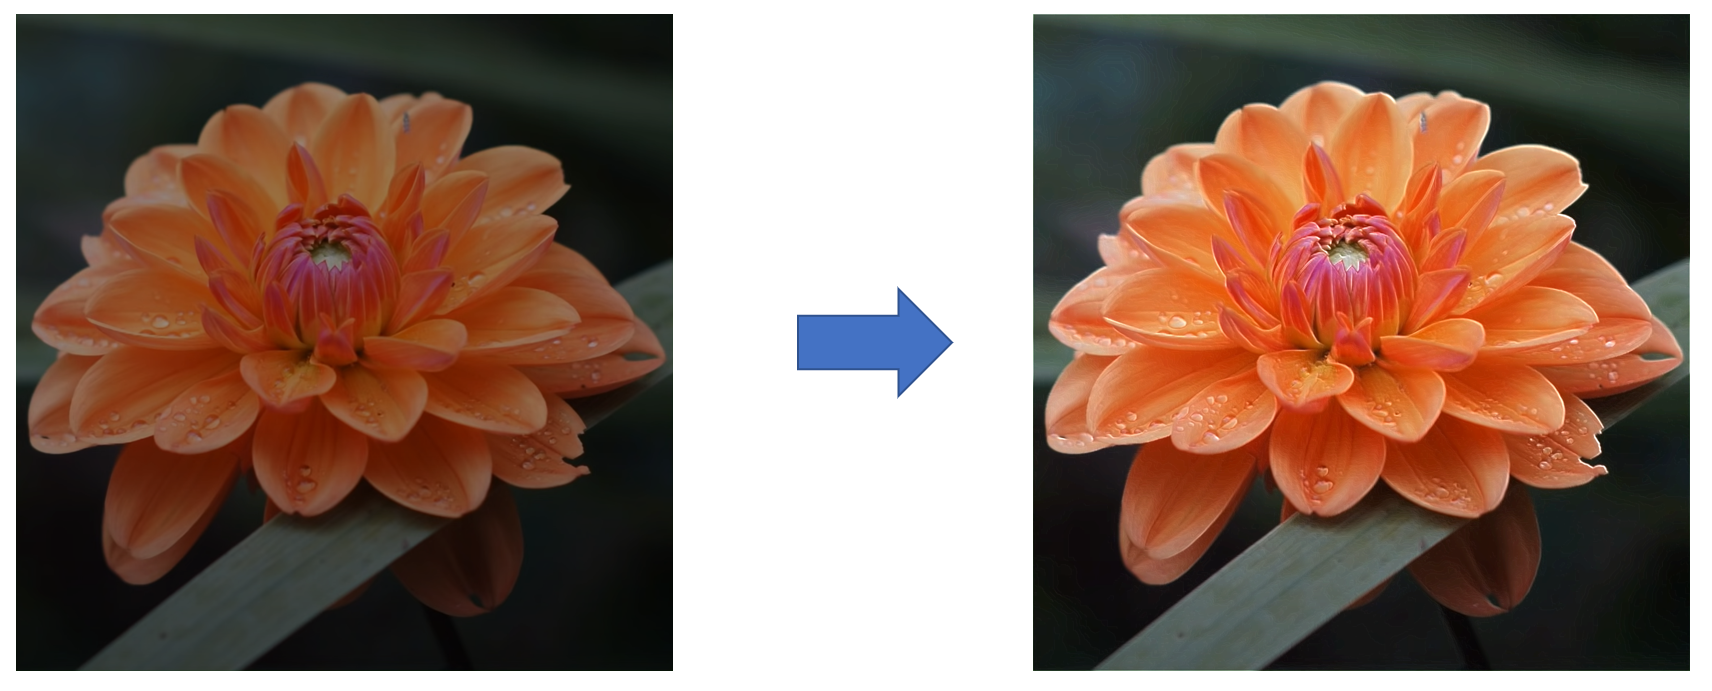

In [ ]:
help(cv2.cvtColor)

In [ ]:
import seaborn as sns
import pandas as pd
def create_random_dataframe(rows, columns):
    # Create a 2D numpy array with random values
    random_array = np.random.rand(rows, columns)

    # Create a dataframe from the numpy array
    df = pd.DataFrame(random_array)

    return df

# Example usage
num_rows = 5
num_columns = 3
random_df = create_random_dataframe(num_rows, num_columns)

In [ ]:
help(sns.heatmap)

In [ ]:
all_data_na = (random_df.isnull().sum() / len(random_df)) * 100
print(all_data_na)
sns.heatmap(random_df.isna(), cmap="Blues")

In [ ]:
rgb_color = (204, 22, 58) 
r = hex(rgb_color[0])
g = hex(rgb_color[1])
b = hex(rgb_color[2])


In [ ]:
# load the image containing coronavirus
np_fl=cv2.imread("T3-flower.png")


display(Image.fromarray(cv2.cvtColor(np_fl, cv2.COLOR_BGR2RGB)))

display(Image.fromarray(cv2.cvtColor((np_fl*1.6).astype(np.uint8), cv2.COLOR_BGR2RGB))) 

#### Task2: Can you localize the virus and count the number? The image path is T3-coronvirus_challenge.png

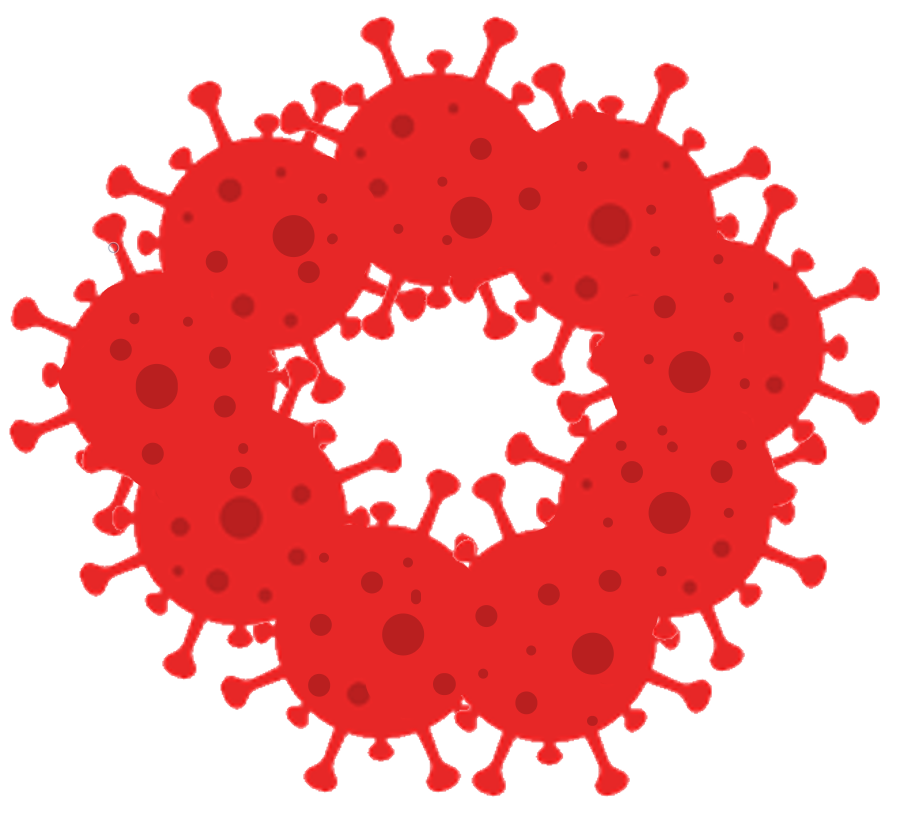

In [ ]:
np_red=cv2.imread("T3-coronvirus_challenge.png")
display(Image.fromarray(cv2.cvtColor(np_red, cv2.COLOR_BGR2RGB)))

In [ ]:
# convert to grey image
img_vir_grey = cv2.cvtColor(np_red, cv2.COLOR_BGR2GRAY)
# get the binary image after thresholding
ret,img_th = cv2.threshold(img_vir_grey,160,255,cv2.THRESH_BINARY)
SE = np.ones((12,12),np.uint8)
img_erosion = cv2.erode(255-img_th, SE, iterations=3)
bw_img=Image.fromarray(img_erosion)
display(bw_img)

In [ ]:
SE = np.ones((26,26),np.uint8)
img_erosion = cv2.erode(255-img_th, SE, iterations=6)
bw_img=Image.fromarray(img_erosion)
display(bw_img)

In [ ]:
from skimage.measure import label,regionprops
from skimage import io
np_labeled=label(img_erosion)
io.imshow(np_labeled)
regions = regionprops(np_labeled)
print(len(regions))

In [ ]:
import numpy as np
np_regions=[]
np_masks=[]
SE = np.ones((5,5),np.uint8)
merged_mask=np.zeros(np_labeled.shape) # 全是0的矩阵
for index in range(1, np_labeled.max()+1):
    # TODO: build a mask for each virus
    np_regions.append((((np_labeled==index)+0)*255).astype(np.uint8))
    np_dilation = cv2.dilate(np_regions[-1], SE, iterations=7)
    np_masks.append(np_dilation)
    merged_mask += np_dilation
    # if index > 10:
    #     display(Image.fromarray(np_dilation))
display(Image.fromarray(merged_mask.astype(np.uint8)))
# np_merge=cv2.merge((merged_mask,merged_mask,merged_mask))*0.4+np_virus*0.6
# display(Image.fromarray(cv2.cvtColor(np_merge.astype(np.uint8), cv2.COLOR_BGR2RGB)))

# 成功了，但是请学习老师给的答案